Chapter 21

# AIC和BIC
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from sklearn import mixture
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

In [2]:
n_samples = 500

# generate random data
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, centers=centers, shuffle=False,
                  random_state=80)

# iris = datasets.load_iris()
# X = iris.data[:, [0,1]]

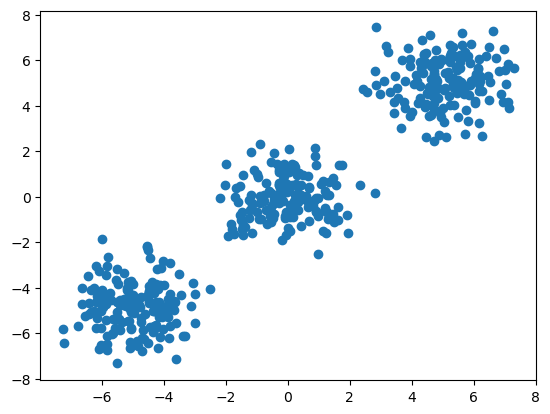

In [3]:
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], marker='o');

df_AIC_BIC = pd.DataFrame()
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']

In [4]:
for cv_type in cv_types:

    
    for n_components in n_components_range:
        
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        aic_i = gmm.aic(X);
        bic_i = gmm.bic(X);
        log_likelihood = gmm.score(X)
        # reproduce AIC
        # -2 * log_likelihood*n_samples + 2 * n_components
        # reproduce BIC
        # -2 * log_likelihood*n_samples + n_components * np.log(n_samples)
        dic_i = pd.DataFrame({'Cov_type':      cv_type, 
                              'K_cluster': [n_components],
                              'AIC':       [aic_i],
                              'BIC':       [bic_i]})

        df_AIC_BIC = pd.concat([df_AIC_BIC,dic_i])

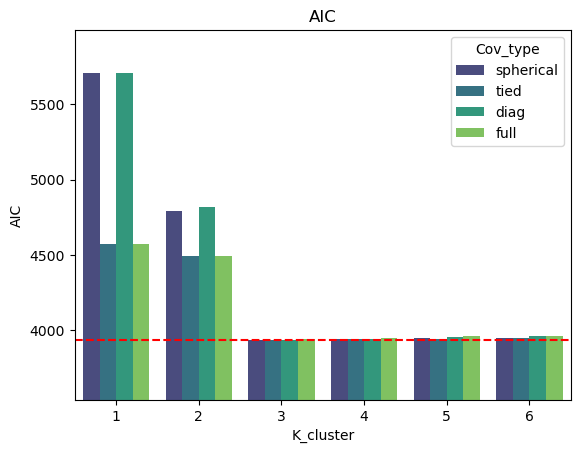

In [5]:
#%% Visualizations

fig, ax = plt.subplots()

# AIC for various K and covariance choices
g = sns.barplot(x = 'K_cluster', y = 'AIC', hue = 'Cov_type', 
                data = df_AIC_BIC, palette = 'viridis')
plt.title('AIC')
plt.axhline(y=df_AIC_BIC['AIC'].min(), color='r', linestyle='--')
g.set(ylim=(df_AIC_BIC['AIC'].min()*0.9, None))
plt.show()

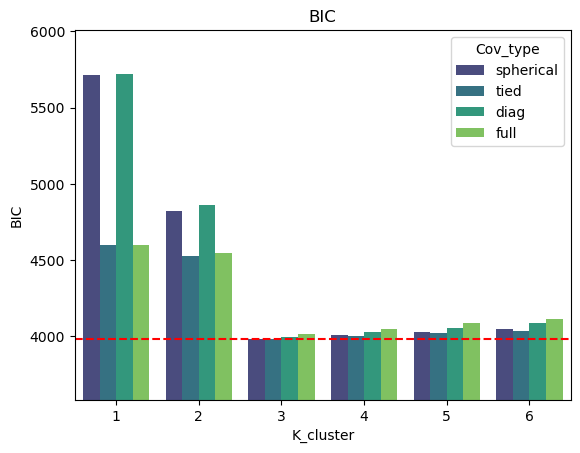

In [6]:
fig, ax = plt.subplots()

# BIC for various K and covariance choices
g = sns.barplot(x = 'K_cluster', y = 'BIC', hue = 'Cov_type', 
                data = df_AIC_BIC, palette = 'viridis')
plt.title('BIC')
plt.axhline(y=df_AIC_BIC['BIC'].min(), color='r', linestyle='--')
g.set(ylim=(df_AIC_BIC['BIC'].min()*0.9, None))
plt.show()